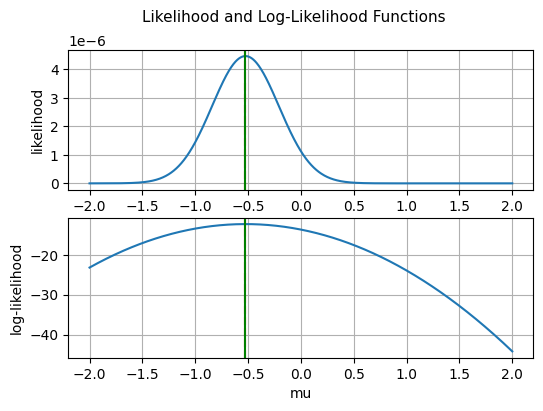

In [30]:
# generate n samples from a Gaussian distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set parameters
mu = 0      # mean
sigma = 1   # standard deviation
n = 10    # number of samples

# Generate samples
x = norm.rvs(loc=mu, scale=sigma, size=n)

# create a likelihood function
def likelihood(mu):
    return np.prod(norm.pdf(x, loc=mu, scale=1))

# create a log-likelihood function
def log_likelihood(mu):
    return np.sum(norm.logpdf(x, loc=mu, scale=1))  # use logpdf for numerical stability
# create a range of mu values

mu_values = np.linspace(-2, 2, 1000)

# calculate the likelihood for each mu value
likelihood_values = [likelihood(mu) for mu in mu_values]
log_likelihood_values = [log_likelihood(mu) for mu in mu_values]

# plot the likelihood function and log-likelihood function in a 1x2 subplot

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4))

ax[0].plot(mu_values, likelihood_values)
# add super title
fig.suptitle('Likelihood and Log-Likelihood Functions', fontsize=11)

ax[0].set_xlabel('mu')
ax[0].set_ylabel('likelihood')
ax[0].grid()
# add verticle line at the maximum of the likelihood function
max_likelihood_mu = mu_values[np.argmax(likelihood_values)]
ax[0].axvline(x=max_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[0].axvline(x=np.mean(x), color='g', linestyle='-')

ax[1].plot(mu_values, log_likelihood_values)
ax[1].set_xlabel('mu')
ax[1].set_ylabel('log-likelihood')
ax[1].grid()
# add verticle line at the maximum of the log-likelihood function
max_log_likelihood_mu = mu_values[np.argmax(log_likelihood_values)]
ax[1].axvline(x=max_log_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[1].axvline(x=np.mean(x), color='g', linestyle='-')
plt.show()



# plot the likelihood function
# Fig = plt.figure(figsize=(6, 3))
# plt.plot(mu_values, likelihood_values)
# plt.title('Likelihood Function')
# plt.xlabel('mu')
# plt.ylabel('likelihood')
# plt.grid()
# plt.show()

# # plot the log-likelihood function
# Fig = plt.figure(figsize=(6, 3))
# plt.plot(mu_values, log_likelihood_values)
# plt.title('Log-Likelihood Function')
# plt.xlabel('mu')
# plt.ylabel('log-likelihood')
# plt.grid()
# plt.show()



Minimum found at x = 4.0598, f(x) = -0.0607


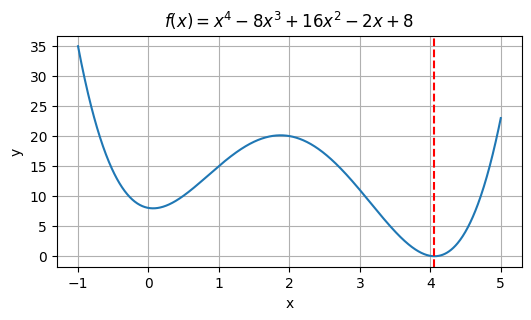

Grid Search: Minimum at x = 4.057057, f(x) = -0.0605


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# plot a polynomial function
x = np.linspace(-1, 5, 1000) # 100 points from -1 to 5
# use coefficients to define the polynomial
coefficients = [1, -8, 16, -2, 8]
# y = x**4 - 8*x**3 + 16*x**2 - 2*x + 8
f = lambda x: np.polyval(coefficients, x)
y = f(x)

# use scipy optimize  to find the minimum of the function and plot a verticle line at
# the minimum of the function

res = minimize_scalar(f, bounds=(-1, 5), method='bounded')
# print the minimum with 4 decimal places
print(f'Minimum found at x = {res.x:.4f}, f(x) = {res.fun:.4f}')


fig = plt.figure(figsize=(6, 3))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x) = x^4 - 8x^3 + 16x^2 - 2x + 8$')
plt.grid()
# add verticle line at the minimum of the function
min_x = x[np.argmin(y)]
plt.axvline(x=min_x, color='r', linestyle='--')
plt.show()
print(f'Grid Search: Minimum at x = {min_x:4f}, f(x) = {y[np.argmin(y)]:.4f}')